# IRK schemes with Gauss-Legendre nodes

<ul id="top">
    <li><a href="#Loading-packages"> 
             Loading Packages</a></li>

<li><a href="#Initial-value-problem:-Burrau-problem">
             Initial value problem: Burrau problem</a></li>

<li><a href="#Integration-with-IRK8-(Fixed-step)">
             Integration with IRK8 (Fixed-step)</a></li>
             
<li><a href="#Integration-with-IRK8-(Adaptive-step)">
             Integration with IRK8 (Adaptive-step)</a></li>

<li><a href="#Error-in-energy">
             Error in energy</a></li> 

</ul>  


## Loading packages

In [10]:
using Pkg
using IRK,LinearAlgebra,Plots,Statistics
using DoubleFloats

<a href="#top">Back to the top</a>

## Initial value problem: Burrau problem

The vector $Gm = (G\, m_1, \ldots, G\, m_N)$

In [11]:
include("InitialBurrau.jl")
u0, Gm =InitialBurrau()
N = length(Gm)
size(u0)

(2, 3, 3)

<a href="#top">Back to the top</a>


## Integration with IRK8 (Fixed-step)

Just to check that the output of the function NbodyODE has the expected type:

In [12]:
include("Nbody.jl")
du0=similar(u0)
NbodyODE!(du0,u0,Gm,0.)
@show size(du0);

size(du0) = (2, 3, 3)


In [36]:
t0 = 0.
T = 63. # Final time
T = 10.
T=2.
dt = 10^(-4) # time-step length

tspan=(t0,T)
prob=ODEProblem(NbodyODE!,u0,tspan,Gm);

In [14]:
(sol0,iter0,steps0)=@time(solve(prob,IRK8(),dt=dt,saveat=dt,adaptive=false,myoutputs=true));

step:1 time=0.0 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2 time=0.00010000000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3 time=0.00020000000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4 time=0.00030000000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:5 time=0.0004000000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:6 time=0.0005000000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:7 time=0.0006000000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:8 time=0.0007000000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:9 time=0.0008000000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000

step:91 time=0.009000000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:92 time=0.009100000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:93 time=0.009200000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:94 time=0.009300000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:95 time=0.009400000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:96 time=0.009500000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:97 time=0.009600000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:98 time=0.009700000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:99 time=0.009800000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  d

step:180 time=0.017900000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:181 time=0.018000000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:182 time=0.018100000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:183 time=0.018200000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:184 time=0.018300000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:185 time=0.018400000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:186 time=0.018500000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:187 time=0.018600000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:188 time=0.018700000000000005 dt=0.00010000000000000002 dtprev=0.0
New step

New step size:  dt=0.00010000000000000002

step:270 time=0.026900000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:271 time=0.027000000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:272 time=0.027100000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:273 time=0.027200000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:274 time=0.027300000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:275 time=0.027400000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:276 time=0.027500000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:277 time=0.027600000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:278 time=0.027700000000000006 dt


step:379 time=0.03780000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:380 time=0.03790000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:381 time=0.038000000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:382 time=0.03810000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:383 time=0.038200000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:384 time=0.03830000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:385 time=0.038400000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:386 time=0.038500000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:387 time=0.03860000000000001 dt=0.00010000000000000002 dtprev=0.0
New step siz

step:468 time=0.046700000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:469 time=0.04680000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:470 time=0.04690000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:471 time=0.04700000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:472 time=0.04710000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:473 time=0.047200000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:474 time=0.04730000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:475 time=0.04740000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:476 time=0.04750000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size: 

step:587 time=0.05860000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:588 time=0.05870000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:589 time=0.05880000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:590 time=0.05890000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:591 time=0.05900000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:592 time=0.059100000000000014 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:593 time=0.05920000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:594 time=0.05930000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:595 time=0.05940000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  

step:678 time=0.06770000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:679 time=0.06780000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:680 time=0.06790000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:681 time=0.06800000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:682 time=0.06810000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:683 time=0.06820000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:684 time=0.06830000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:685 time=0.06840000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:686 time=0.06850000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  d

New step size:  dt=0.00010000000000000002

step:769 time=0.07680000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:770 time=0.07690000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:771 time=0.07700000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:772 time=0.07710000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:773 time=0.07720000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:774 time=0.07730000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:775 time=0.07740000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:776 time=0.07750000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:777 time=0.07760000000000002 dt=0.000100


step:914 time=0.09130000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:915 time=0.09140000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:916 time=0.09150000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:917 time=0.09160000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:918 time=0.09170000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:919 time=0.09180000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:920 time=0.09190000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:921 time=0.09200000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:922 time=0.09210000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  

New step size:  dt=0.00010000000000000002

step:1004 time=0.10030000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1005 time=0.10040000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1006 time=0.10050000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1007 time=0.10060000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1008 time=0.10070000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1009 time=0.10080000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1010 time=0.10090000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1011 time=0.10100000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1012 time=0.10110000000000002 dt

New step size:  dt=0.00010000000000000002

step:1093 time=0.10920000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1094 time=0.10930000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1095 time=0.10940000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1096 time=0.10950000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1097 time=0.10960000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1098 time=0.10970000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1099 time=0.10980000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1100 time=0.10990000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1101 time=0.11000000000000001 dt

New step size:  dt=0.00010000000000000002

step:1249 time=0.12480000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1250 time=0.12490000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1251 time=0.12500000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1252 time=0.12510000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1253 time=0.12520000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1254 time=0.12530000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1255 time=0.1254 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1256 time=0.12550000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1257 time=0.12560000000000002 dt=0.0001000000

New step size:  dt=0.00010000000000000002

step:1340 time=0.13390000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1341 time=0.13400000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1342 time=0.13410000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1343 time=0.1342 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1344 time=0.13430000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1345 time=0.13440000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1346 time=0.13450000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1347 time=0.13460000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1348 time=0.13470000000000001 dt=0.0001000000

step:1492 time=0.14910000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1493 time=0.14920000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1494 time=0.14930000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1495 time=0.14940000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1496 time=0.14950000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1497 time=0.14960000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1498 time=0.14970000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1499 time=0.14980000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1500 time=0.14990000000000003 dt=0.00010000000000000002 dtprev=0.0
New step

step:1581 time=0.15800000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1582 time=0.15810000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1583 time=0.15820000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1584 time=0.15830000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1585 time=0.15840000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1586 time=0.15850000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1587 time=0.15860000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1588 time=0.15870000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1589 time=0.15880000000000002 dt=0.00010000000000000002 dtprev=0.0
New step

step:1670 time=0.16690000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1671 time=0.16700000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1672 time=0.16710000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1673 time=0.16720000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1674 time=0.16730000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1675 time=0.16740000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1676 time=0.16750000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1677 time=0.16760000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1678 time=0.16770000000000004 dt=0.00010000000000000002 dtprev=0.0
New step

New step size:  dt=0.00010000000000000002

step:1804 time=0.18030000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1805 time=0.18040000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1806 time=0.18050000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1807 time=0.18060000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1808 time=0.18070000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1809 time=0.18080000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1810 time=0.18090000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1811 time=0.18100000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1812 time=0.18110000000000004 dt

New step size:  dt=0.00010000000000000002

step:1893 time=0.18920000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1894 time=0.18930000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1895 time=0.18940000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1896 time=0.18950000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1897 time=0.18960000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1898 time=0.18970000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1899 time=0.18980000000000002 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1900 time=0.18990000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1901 time=0.19000000000000003 dt

step:1982 time=0.19810000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1983 time=0.19820000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1984 time=0.19830000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1985 time=0.19840000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1986 time=0.19850000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1987 time=0.19860000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1988 time=0.19870000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1989 time=0.19880000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:1990 time=0.19890000000000005 dt=0.00010000000000000002 dtprev=0.0
New step

New step size:  dt=0.00010000000000000002

step:2129 time=0.21280000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2130 time=0.21290000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2131 time=0.21300000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2132 time=0.21310000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2133 time=0.21320000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2134 time=0.21330000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2135 time=0.21340000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2136 time=0.21350000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2137 time=0.21360000000000004 dt

New step size:  dt=0.00010000000000000002

step:2218 time=0.22170000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2219 time=0.22180000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2220 time=0.22190000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2221 time=0.22200000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2222 time=0.22210000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2223 time=0.22220000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2224 time=0.22230000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2225 time=0.22240000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2226 time=0.22250000000000003 dt

step:2307 time=0.23060000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2308 time=0.23070000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2309 time=0.23080000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2310 time=0.23090000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2311 time=0.23100000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2312 time=0.23110000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2313 time=0.23120000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2314 time=0.23130000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2315 time=0.23140000000000005 dt=0.00010000000000000002 dtprev=0.0
New step

New step size:  dt=0.00010000000000000002

step:2400 time=0.23990000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2401 time=0.24000000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2402 time=0.24010000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2403 time=0.24020000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2404 time=0.24030000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2405 time=0.24040000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2406 time=0.24050000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2407 time=0.24060000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2408 time=0.24070000000000005 dt

New step size:  dt=0.00010000000000000002

step:2489 time=0.24880000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2490 time=0.24890000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2491 time=0.24900000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2492 time=0.24910000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2493 time=0.24920000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2494 time=0.24930000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2495 time=0.24940000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2496 time=0.24950000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2497 time=0.24960000000000004 dt

step:2579 time=0.25780000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2580 time=0.2579000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2581 time=0.25800000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2582 time=0.25810000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2583 time=0.25820000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2584 time=0.25830000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2585 time=0.2584000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2586 time=0.25850000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2587 time=0.25860000000000005 dt=0.00010000000000000002 dtprev=0.0
New step s

step:2728 time=0.27270000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2729 time=0.27280000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2730 time=0.27290000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2731 time=0.2730000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2732 time=0.27310000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2733 time=0.27320000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2734 time=0.27330000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2735 time=0.27340000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2736 time=0.2735000000000001 dt=0.00010000000000000002 dtprev=0.0
New step s

New step size:  dt=0.00010000000000000002

step:2819 time=0.28180000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2820 time=0.28190000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2821 time=0.28200000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2822 time=0.2821000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2823 time=0.28220000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2824 time=0.28230000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2825 time=0.28240000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2826 time=0.28250000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2827 time=0.2826000000000001 dt=0

step:2908 time=0.29070000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2909 time=0.29080000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2910 time=0.29090000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2911 time=0.29100000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2912 time=0.2911000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2913 time=0.29120000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2914 time=0.29130000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2915 time=0.29140000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:2916 time=0.29150000000000004 dt=0.00010000000000000002 dtprev=0.0
New step 

step:3015 time=0.30140000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3016 time=0.30150000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3017 time=0.30160000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3018 time=0.3017000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3019 time=0.30180000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3020 time=0.30190000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3021 time=0.30200000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3022 time=0.30210000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3023 time=0.3022000000000001 dt=0.00010000000000000002 dtprev=0.0
New step s

step:3104 time=0.3103000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3105 time=0.31040000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3106 time=0.31050000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3107 time=0.31060000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3108 time=0.31070000000000003 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3109 time=0.3108000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3110 time=0.31090000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3111 time=0.31100000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3112 time=0.31110000000000004 dt=0.00010000000000000002 dtprev=0.0
New step s

New step size:  dt=0.00010000000000000002

step:3194 time=0.3193000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3195 time=0.3194000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3196 time=0.31950000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3197 time=0.31960000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3198 time=0.31970000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3199 time=0.3198000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3200 time=0.3199000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3201 time=0.32000000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3202 time=0.32010000000000005 dt=0.0

step:3325 time=0.3324000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3326 time=0.3325000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3327 time=0.33260000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3328 time=0.33270000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3329 time=0.33280000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3330 time=0.3329000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3331 time=0.3330000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3332 time=0.33310000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3333 time=0.33320000000000005 dt=0.00010000000000000002 dtprev=0.0
New step siz

New step size:  dt=0.00010000000000000002

step:3415 time=0.34140000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3416 time=0.3415000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3417 time=0.34160000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3418 time=0.34170000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3419 time=0.34180000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3420 time=0.34190000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3421 time=0.3420000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3422 time=0.34210000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3423 time=0.34220000000000006 dt=0

step:3504 time=0.35030000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3505 time=0.35040000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3506 time=0.3505000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3507 time=0.3506000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3508 time=0.35070000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3509 time=0.35080000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3510 time=0.35090000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3511 time=0.3510000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3512 time=0.3511000000000001 dt=0.00010000000000000002 dtprev=0.0
New step siz

New step size:  dt=0.00010000000000000002

step:3587 time=0.3586000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3588 time=0.3587000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3589 time=0.35880000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3590 time=0.35890000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3591 time=0.35900000000000004 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3592 time=0.3591000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3593 time=0.3592000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3594 time=0.35930000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3595 time=0.35940000000000005 dt=0.0

New step size:  dt=0.00010000000000000002

step:3676 time=0.36750000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3677 time=0.3676000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3678 time=0.3677000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3679 time=0.36780000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3680 time=0.36790000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3681 time=0.36800000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3682 time=0.3681000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3683 time=0.3682000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3684 time=0.36830000000000007 dt=0.0

step:3765 time=0.37640000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3766 time=0.37650000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3767 time=0.37660000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3768 time=0.3767000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3769 time=0.3768000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3770 time=0.37690000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3771 time=0.37700000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3772 time=0.37710000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3773 time=0.3772000000000001 dt=0.00010000000000000002 dtprev=0.0
New step si

step:3912 time=0.39110000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3913 time=0.39120000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3914 time=0.3913000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3915 time=0.3914000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3916 time=0.39150000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3917 time=0.39160000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3918 time=0.39170000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3919 time=0.3918000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:3920 time=0.3919000000000001 dt=0.00010000000000000002 dtprev=0.0
New step siz

New step size:  dt=0.00010000000000000002

step:4002 time=0.40010000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4003 time=0.40020000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4004 time=0.4003000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4005 time=0.4004000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4006 time=0.4005000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4007 time=0.40060000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4008 time=0.40070000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4009 time=0.4008000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4010 time=0.4009000000000001 dt=0.00

step:4091 time=0.4090000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4092 time=0.4091000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4093 time=0.40920000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4094 time=0.40930000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4095 time=0.4094000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4096 time=0.4095000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4097 time=0.4096000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4098 time=0.40970000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4099 time=0.40980000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size

New step size:  dt=0.00010000000000000002

step:4229 time=0.42280000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4230 time=0.42290000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4231 time=0.4230000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4232 time=0.4231000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4233 time=0.4232000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4234 time=0.42330000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4235 time=0.42340000000000005 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4236 time=0.4235000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4237 time=0.4236000000000001 dt=0.00

step:4318 time=0.4317000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4319 time=0.4318000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4320 time=0.43190000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4321 time=0.4320000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4322 time=0.4321000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4323 time=0.4322000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4324 time=0.4323000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4325 time=0.43240000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4326 time=0.4325000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size: 

New step size:  dt=0.00010000000000000002

step:4408 time=0.4407000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4409 time=0.4408000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4410 time=0.44090000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4411 time=0.44100000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4412 time=0.4411000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4413 time=0.4412000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4414 time=0.4413000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4415 time=0.44140000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4416 time=0.44150000000000006 dt=0.00

Excessive output truncated after 524290 bytes.

.0
New step size:  dt=0.00010000000000000002

step:4548 time=0.4547000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4549 time=0.4548000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4550 time=0.4549000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4551 time=0.45500000000000007 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4552 time=0.45510000000000006 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4553 time=0.4552000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4554 time=0.4553000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4555 time=0.4554000000000001 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00010000000000000002

step:4556 time=0.45550000000000007 dt=0.

In [15]:
(length(sol0.t),mean(iter0[2:end]),sum(iter0[2:end]))

(18001, 3.0166666666666666, 54300)

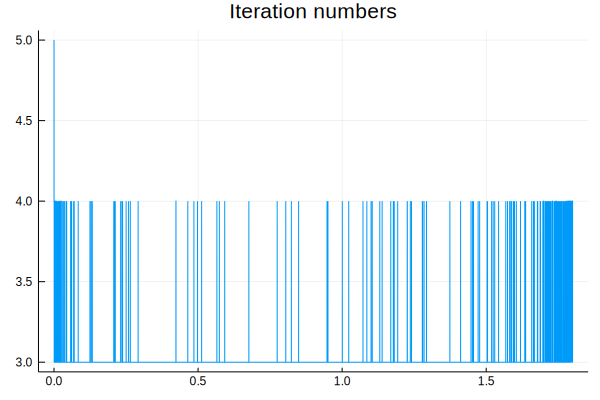

In [16]:
plot(sol0.t[2:end],iter0[2:end], title="Iteration numbers", legend=false)

## Integration with IRK8 (Adaptive-step)


### Retol=1e-6, abstol=1e-6

In [17]:
#T=63.
#tspan=(t0,T)
(sol1,iter1,steps1)=@time(solve(prob,IRK8(),dt=dt,saveat=dt,
                          reltol=1e-6, abstol=1e-6,myoutputs=true,initial_interp=true));

step:1 time=0.0 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00020000000000000004

step:2 time=0.00010000000000000002 dt=0.00020000000000000004 dtprev=0.00010000000000000002
New step size:  dt=0.0004000000000000001

step:3 time=0.00030000000000000003 dt=0.0004000000000000001 dtprev=0.00020000000000000004
New step size:  dt=0.0008000000000000001

step:4 time=0.0007000000000000001 dt=0.0008000000000000001 dtprev=0.0004000000000000001
New step size:  dt=0.0016000000000000003

step:5 time=0.0015000000000000002 dt=0.0016000000000000003 dtprev=0.0008000000000000001
New step size:  dt=0.0032000000000000006

step:6 time=0.0031000000000000008 dt=0.0032000000000000006 dtprev=0.0016000000000000003
New step size:  dt=0.006400000000000001

step:7 time=0.006300000000000001 dt=0.006400000000000001 dtprev=0.0032000000000000006
New step size:  dt=0.012800000000000002

step:8 time=0.012700000000000003 dt=0.012800000000000002 dtprev=0.006400000000000001
New step size:  dt=0.02560000000000000

In [18]:
(length(steps1),minimum(steps1[2:end]),mean(iter1),sum(iter1))

(21, 0.00010000000000000002, 8.285714285714286, 174)

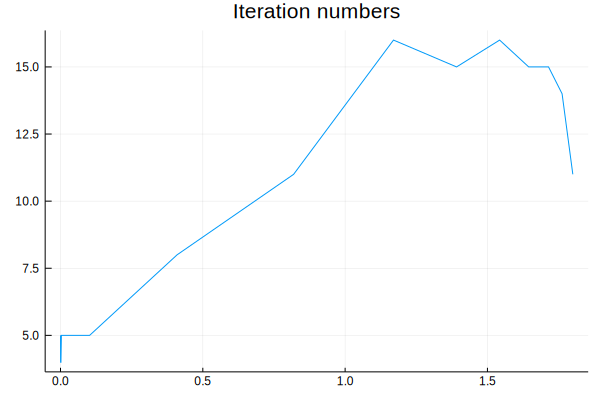

In [19]:
plot(sol1.t[2:end],iter1[2:end], title="Iteration numbers", legend=false)

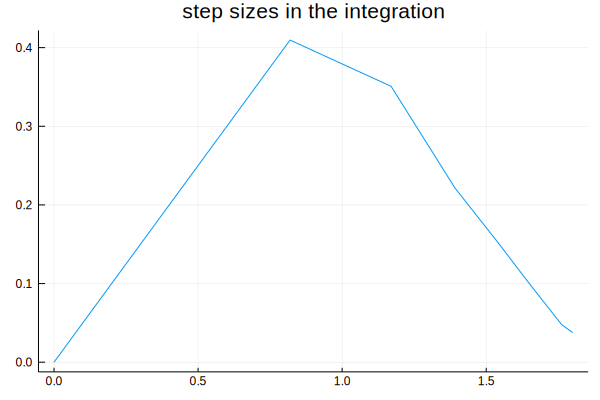

In [20]:
plot(sol1.t,steps1, title="step sizes in the integration", legend=false)

### Retol=1e-8, abstol=1e-8

In [21]:
(sol2,iter2,steps2)=@time(solve(prob,IRK8(),dt=dt,saveat=dt,
                          reltol=1e-8, abstol=1e-8,myoutputs=true,initial_interp=true));

step:1 time=0.0 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00020000000000000004

step:2 time=0.00010000000000000002 dt=0.00020000000000000004 dtprev=0.00010000000000000002
New step size:  dt=0.0004000000000000001

step:3 time=0.00030000000000000003 dt=0.0004000000000000001 dtprev=0.00020000000000000004
New step size:  dt=0.0008000000000000001

step:4 time=0.0007000000000000001 dt=0.0008000000000000001 dtprev=0.0004000000000000001
New step size:  dt=0.0016000000000000003

step:5 time=0.0015000000000000002 dt=0.0016000000000000003 dtprev=0.0008000000000000001
New step size:  dt=0.0032000000000000006

step:6 time=0.0031000000000000008 dt=0.0032000000000000006 dtprev=0.0016000000000000003
New step size:  dt=0.006400000000000001

step:7 time=0.006300000000000001 dt=0.006400000000000001 dtprev=0.0032000000000000006
New step size:  dt=0.012800000000000002

step:8 time=0.012700000000000003 dt=0.012800000000000002 dtprev=0.006400000000000001
New step size:  dt=0.02560000000000000

In [22]:
(length(steps2),minimum(steps2[2:end]),mean(iter2),sum(iter2))

(26, 0.00010000000000000002, 8.73076923076923, 227)

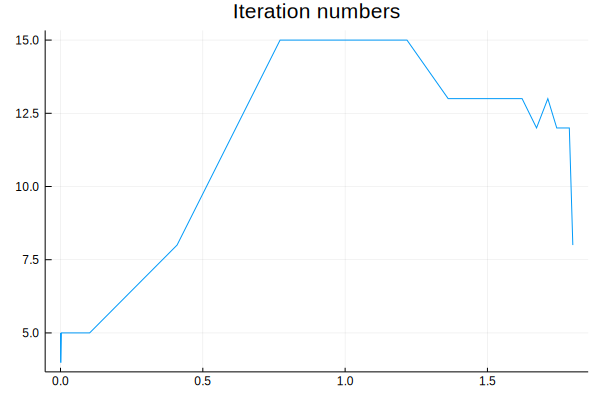

In [23]:
plot(sol2.t[2:end],iter2[2:end], title="Iteration numbers", legend=false)

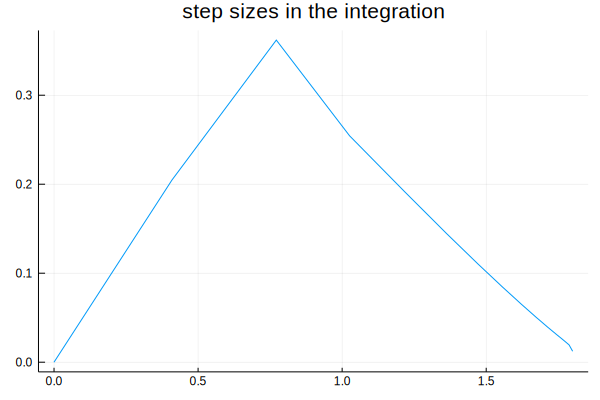

In [24]:
plot(sol2.t,steps2, title="step sizes in the integration", legend=false)

### Retol=1e-10, abstol=1e-10

In [25]:
(sol3,iter3,steps3)=@time(solve(prob,IRK8(),dt=dt,saveat=dt,
                        reltol=1e-10, abstol=1e-10,myoutputs=true,initial_interp=true));

step:1 time=0.0 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00020000000000000004

step:2 time=0.00010000000000000002 dt=0.00020000000000000004 dtprev=0.00010000000000000002
New step size:  dt=0.0004000000000000001

step:3 time=0.00030000000000000003 dt=0.0004000000000000001 dtprev=0.00020000000000000004
New step size:  dt=0.0008000000000000001

step:4 time=0.0007000000000000001 dt=0.0008000000000000001 dtprev=0.0004000000000000001
New step size:  dt=0.0016000000000000003

step:5 time=0.0015000000000000002 dt=0.0016000000000000003 dtprev=0.0008000000000000001
New step size:  dt=0.0032000000000000006

step:6 time=0.0031000000000000008 dt=0.0032000000000000006 dtprev=0.0016000000000000003
New step size:  dt=0.006400000000000001

step:7 time=0.006300000000000001 dt=0.006400000000000001 dtprev=0.0032000000000000006
New step size:  dt=0.012800000000000002

step:8 time=0.012700000000000003 dt=0.012800000000000002 dtprev=0.006400000000000001
New step size:  dt=0.02560000000000000

In [26]:
(length(steps3),minimum(steps3[2:end]),mean(iter3),sum(iter3))

(37, 0.00010000000000000002, 8.972972972972974, 332)

### Retol=1e-12, abstol=1e-12

In [27]:
#Arazoak: urrats tamaina asko txikitzen da
#
(sol4,iter4,steps4)=@time(solve(prob,IRK8(),dt=dt,saveat=dt,
                        reltol=1e-12, abstol=1e-12,myoutputs=true));

step:1 time=0.0 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00020000000000000004

step:2 time=0.00010000000000000002 dt=0.00020000000000000004 dtprev=0.00010000000000000002
New step size:  dt=0.0004000000000000001

step:3 time=0.00030000000000000003 dt=0.0004000000000000001 dtprev=0.00020000000000000004
New step size:  dt=0.0008000000000000001

step:4 time=0.0007000000000000001 dt=0.0008000000000000001 dtprev=0.0004000000000000001
New step size:  dt=0.0016000000000000003

step:5 time=0.0015000000000000002 dt=0.0016000000000000003 dtprev=0.0008000000000000001
New step size:  dt=0.0032000000000000006

step:6 time=0.0031000000000000008 dt=0.0032000000000000006 dtprev=0.0016000000000000003
New step size:  dt=0.006400000000000001

step:7 time=0.006300000000000001 dt=0.006400000000000001 dtprev=0.0032000000000000006
New step size:  dt=0.012800000000000002

step:8 time=0.012700000000000003 dt=0.012800000000000002 dtprev=0.006400000000000001
New step size:  dt=0.02560000000000000

In [28]:
(length(steps4),minimum(steps4[2:end]),mean(iter4),sum(iter4))

(56, 0.00010000000000000002, 5.446428571428571, 305)

### Retol=1e-14, abstol=1e-14

In [37]:
(sol5,iter5,steps5)=@time(solve(prob,IRK8(),dt=dt,saveat=dt,
                        reltol=1e-14, abstol=1e-14,myoutputs=true));

step:1 time=0.0 dt=0.00010000000000000002 dtprev=0.0
New step size:  dt=0.00018174960475259277

step:2 time=0.00010000000000000002 dt=0.00018174960475259277 dtprev=0.00010000000000000002
New step size:  dt=0.0003457096910606774

step:3 time=0.0002817496047525928 dt=0.0003457096910606774 dtprev=0.00018174960475259277
New step size:  dt=0.0006914193821213548

step:4 time=0.0006274592958132702 dt=0.0006914193821213548 dtprev=0.0003457096910606774
New step size:  dt=0.0013828387642427096

step:5 time=0.001318878677934625 dt=0.0013828387642427096 dtprev=0.0006914193821213548
New step size:  dt=0.0025670942377082687

step:6 time=0.002701717442177335 dt=0.0025670942377082687 dtprev=0.0013828387642427096
New step size:  dt=0.005134188475416537

step:7 time=0.0052688116798856035 dt=0.005134188475416537 dtprev=0.0025670942377082687
New step size:  dt=0.010268376950833075

step:8 time=0.01040300015530214 dt=0.010268376950833075 dtprev=0.005134188475416537
New step size:  dt=0.01993337787360124

s

New step size:  dt=0.0037585291065507457

step:84 time=1.7525378936011904 dt=0.0037585291065507457 dtprev=0.00389137907149179
New step size:  dt=0.0036320704382908652

step:85 time=1.7562964227077411 dt=0.0036320704382908652 dtprev=0.0037585291065507457
New step size:  dt=0.003512944017389236

step:86 time=1.759928493146032 dt=0.003512944017389236 dtprev=0.0036320704382908652
New step size:  dt=0.0033834119732145443

step:87 time=1.7634414371634213 dt=0.0033834119732145443 dtprev=0.003512944017389236
New step size:  dt=0.0032763126797347203

step:88 time=1.7668248491366358 dt=0.0032763126797347203 dtprev=0.0033834119732145443
New step size:  dt=0.003147315146786335

step:89 time=1.7701011618163704 dt=0.003147315146786335 dtprev=0.0032763126797347203
New step size:  dt=0.003029022504981471

step:90 time=1.7732484769631567 dt=0.003029022504981471 dtprev=0.003147315146786335
New step size:  dt=0.0029295594507824764

step:91 time=1.7762774994681383 dt=0.0029295594507824764 dtprev=0.0030290

New step size:  dt=0.00046312742366576846

step:158 time=1.8579977101652925 dt=0.00046312742366576846 dtprev=0.00041751031213941003
Rejected step. dt=0.00046312742366576846 estmate=3.5092085160128077
New step size:  dt=0.0004195855131804517

step:159 time=1.858384801521122 dt=0.0004195855131804517 dtprev=0.0003870913558294317
New step size:  dt=0.00042970846183338767

step:160 time=1.8588043870343023 dt=0.00042970846183338767 dtprev=0.0004195855131804517
New step size:  dt=0.00040186449041516555

step:161 time=1.8592340954961357 dt=0.00040186449041516555 dtprev=0.00042970846183338767
New step size:  dt=0.0003819723136042073

step:162 time=1.8596359599865508 dt=0.0003819723136042073 dtprev=0.00040186449041516555
Rejected step. dt=0.0003819723136042073 estmate=2.358827546684649
New step size:  dt=0.00037394632435623415

step:163 time=1.8599738610605991 dt=0.00037394632435623415 dtprev=0.0003379010740481647
New step size:  dt=0.0003834259668594813

step:164 time=1.8603478073849553 dt=0.00

Rejected step. dt=1.2231940778767963e-5 estmate=2.2706408942636545
New step size:  dt=1.294518552674272e-5

step:220 time=1.8704283544772078 dt=1.294518552674272e-5 dtprev=1.0879702476306398e-5
Rejected step. dt=1.294518552674272e-5 estmate=2.6733029020819687
New step size:  dt=1.1191585240223296e-5

step:221 time=1.8704396031529433 dt=1.1191585240223296e-5 dtprev=1.1248675735547309e-5
Rejected step. dt=1.1191585240223296e-5 estmate=2.0174779064372186
New step size:  dt=9.364092827453446e-6

step:222 time=1.8704497270447293 dt=9.364092827453446e-6 dtprev=1.0123891786097451e-5
Rejected step. dt=9.364092827453446e-6 estmate=2.416386759117025
Rejected step. dt=8.255200891833206e-6 estmate=2.5616466464358307
Rejected step. dt=7.217183662983585e-6 estmate=4.9055838643796665
New step size:  dt=5.335166429020043e-6

step:223 time=1.87045547743945 dt=5.335166429020043e-6 dtprev=5.7503947205383855e-6
Rejected step. dt=5.335166429020043e-6 estmate=2.0848854733937445
New step size:  dt=5.78404503

step:278 time=1.8704876421208472 dt=9.615918946600588e-9 dtprev=1.0239013470134345e-8
Rejected step. dt=9.615918946600588e-9 estmate=2.3893795452037354
New step size:  dt=9.167372265842038e-9

step:279 time=1.8704876506116754 dt=9.167372265842038e-9 dtprev=8.490828314151291e-9
New step size:  dt=8.335595830218337e-9

step:280 time=1.8704876597790476 dt=8.335595830218337e-9 dtprev=9.167372265842038e-9
Rejected step. dt=8.335595830218337e-9 estmate=2.7097111896180444
New step size:  dt=7.310265880971451e-9

step:281 time=1.8704876670082522 dt=7.310265880971451e-9 dtprev=7.2292044158728635e-9
New step size:  dt=7.1011060799831185e-9

step:282 time=1.870487674318518 dt=7.1011060799831185e-9 dtprev=7.310265880971451e-9
New step size:  dt=6.8500193715765436e-9

step:283 time=1.870487681419624 dt=6.8500193715765436e-9 dtprev=7.1011060799831185e-9
Rejected step. dt=6.8500193715765436e-9 estmate=3.4820245326503962
New step size:  dt=6.025780001256943e-9

step:284 time=1.8704876871513743 dt=6.02

Rejected step. dt=2.4681631352262868e-11 estmate=2.0674434927785095
New step size:  dt=2.3461545466997247e-11

step:341 time=1.8704877576440029 dt=2.3461545466997247e-11 dtprev=2.2249072520240097e-11
New step size:  dt=2.241001313378352e-11

step:342 time=1.8704877576674643 dt=2.241001313378352e-11 dtprev=2.3461545466997247e-11
New step size:  dt=2.095250994759366e-11

step:343 time=1.8704877576898744 dt=2.095250994759366e-11 dtprev=2.241001313378352e-11
New step size:  dt=2.0456922636755154e-11

step:344 time=1.870487757710827 dt=2.0456922636755154e-11 dtprev=2.095250994759366e-11
Rejected step. dt=2.0456922636755154e-11 estmate=2.7203203714382025
Rejected step. dt=1.7731755066999007e-11 estmate=4.461325409885373
New step size:  dt=1.3169332203776298e-11

step:345 time=1.870487757725148 dt=1.3169332203776298e-11 dtprev=1.4320928163381635e-11
New step size:  dt=1.2857839503678818e-11

step:346 time=1.8704877577383172 dt=1.2857839503678818e-11 dtprev=1.3169332203776298e-11
New step size

step:438 time=1.8704877578959989 dt=9.736737127809424e-16 dtprev=9.161377363719255e-16
New step size:  dt=9.299377238007595e-16

step:439 time=1.8704877578959997 dt=9.299377238007595e-16 dtprev=9.736737127809424e-16
Rejected step. dt=9.299377238007595e-16 estmate=2.3938819032960685
New step size:  dt=7.4574238509845835e-16

step:440 time=1.8704877578960006 dt=7.4574238509845835e-16 dtprev=8.209114892370076e-16
New step size:  dt=6.758649365290367e-16

step:441 time=1.8704877578960013 dt=6.758649365290367e-16 dtprev=7.4574238509845835e-16
New step size:  dt=7.532903387967201e-16

step:442 time=1.870487757896002 dt=7.532903387967201e-16 dtprev=6.758649365290367e-16
Rejected step. dt=7.532903387967201e-16 estmate=2.502694717081944
New step size:  dt=6.532051497655085e-16

step:443 time=1.8704877578960026 dt=6.532051497655085e-16 dtprev=6.607649325935069e-16
New step size:  dt=6.062047730827848e-16

step:444 time=1.8704877578960033 dt=6.062047730827848e-16 dtprev=6.532051497655085e-16
Reje

New step size:  dt=6.391460756773039e-18

step:503 time=1.8704877578960082 dt=6.391460756773039e-18 dtprev=6.563080549959509e-18
New step size:  dt=7.289942002615038e-18

step:504 time=1.8704877578960082 dt=7.289942002615038e-18 dtprev=6.391460756773039e-18
New step size:  dt=7.38714838426853e-18

step:505 time=1.8704877578960082 dt=7.38714838426853e-18 dtprev=7.289942002615038e-18
New step size:  dt=6.85561742987197e-18

step:506 time=1.8704877578960082 dt=6.85561742987197e-18 dtprev=7.38714838426853e-18
New step size:  dt=6.681797777212795e-18

step:507 time=1.8704877578960082 dt=6.681797777212795e-18 dtprev=6.85561742987197e-18
New step size:  dt=6.59091094622596e-18

step:508 time=1.8704877578960082 dt=6.59091094622596e-18 dtprev=6.681797777212795e-18
New step size:  dt=6.501260371756046e-18

step:509 time=1.8704877578960082 dt=6.501260371756046e-18 dtprev=6.59091094622596e-18
New step size:  dt=6.06180078546122e-18

step:510 time=1.8704877578960082 dt=6.06180078546122e-18 dtprev=6

Rejected step. dt=1.071113718275479e-17 estmate=2.4482883101879414
Rejected step. dt=9.425052704262847e-18 estmate=2.0130370550434185
New step size:  dt=8.487214987276403e-18

step:628 time=1.870487757896009 dt=8.487214987276403e-18 dtprev=8.528573406246474e-18
New step size:  dt=8.512595199792335e-18

step:629 time=1.870487757896009 dt=8.512595199792335e-18 dtprev=8.487214987276403e-18
New step size:  dt=8.5380513094298e-18

step:630 time=1.870487757896009 dt=8.5380513094298e-18 dtprev=8.512595199792335e-18
New step size:  dt=8.775245337670848e-18

step:631 time=1.870487757896009 dt=8.775245337670848e-18 dtprev=8.5380513094298e-18
New step size:  dt=8.801486877667588e-18

step:632 time=1.870487757896009 dt=8.801486877667588e-18 dtprev=8.775245337670848e-18
New step size:  dt=8.827806890504108e-18

step:633 time=1.870487757896009 dt=8.827806890504108e-18 dtprev=8.801486877667588e-18
New step size:  dt=9.004448242114594e-18

step:634 time=1.870487757896009 dt=9.004448242114594e-18 dtpre

New step size:  dt=5.095189703347544e-18

step:698 time=1.8704877578960095 dt=5.095189703347544e-18 dtprev=4.846566712902156e-18
New step size:  dt=5.932112094556425e-18

step:699 time=1.8704877578960095 dt=5.932112094556425e-18 dtprev=5.095189703347544e-18
New step size:  dt=5.8609679044675354e-18

step:700 time=1.8704877578960095 dt=5.8609679044675354e-18 dtprev=5.932112094556425e-18
New step size:  dt=6.549603616444452e-18

step:701 time=1.8704877578960095 dt=6.549603616444452e-18 dtprev=5.8609679044675354e-18
New step size:  dt=6.742537992803041e-18

step:702 time=1.8704877578960095 dt=6.742537992803041e-18 dtprev=6.549603616444452e-18
New step size:  dt=7.165987973618947e-18

step:703 time=1.8704877578960095 dt=7.165987973618947e-18 dtprev=6.742537992803041e-18
New step size:  dt=6.681595420451727e-18

step:704 time=1.8704877578960095 dt=6.681595420451727e-18 dtprev=7.165987973618947e-18
New step size:  dt=6.878417933846067e-18

step:705 time=1.8704877578960095 dt=6.87841793384606

step:781 time=1.87048775789601 dt=5.968063636214064e-18 dtprev=6.305108448774124e-18
New step size:  dt=7.477260691157877e-18

step:782 time=1.87048775789601 dt=7.477260691157877e-18 dtprev=5.968063636214064e-18
New step size:  dt=7.387585437643387e-18

step:783 time=1.87048775789601 dt=7.387585437643387e-18 dtprev=7.477260691157877e-18
New step size:  dt=7.298985665033608e-18

step:784 time=1.87048775789601 dt=7.298985665033608e-18 dtprev=7.387585437643387e-18
New step size:  dt=7.02604453550974e-18

step:785 time=1.87048775789601 dt=7.02604453550974e-18 dtprev=7.298985665033608e-18
Rejected step. dt=7.02604453550974e-18 estmate=2.0130370550432928
New step size:  dt=6.053120928986219e-18

step:786 time=1.87048775789601 dt=6.053120928986219e-18 dtprev=6.357750821865448e-18
New step size:  dt=5.9646875842421104e-18

step:787 time=1.87048775789601 dt=5.9646875842421104e-18 dtprev=6.053120928986219e-18
New step size:  dt=5.676361865241828e-18

step:788 time=1.87048775789601 dt=5.676361865

New step size:  dt=7.516841981438164e-18

step:852 time=1.8704877578960104 dt=7.516841981438164e-18 dtprev=6.890823741749494e-18
New step size:  dt=7.193680202847224e-18

step:853 time=1.8704877578960104 dt=7.193680202847224e-18 dtprev=7.516841981438164e-18
New step size:  dt=7.645463158633797e-18

step:854 time=1.8704877578960104 dt=7.645463158633797e-18 dtprev=7.193680202847224e-18
New step size:  dt=6.94538449742215e-18

step:855 time=1.8704877578960104 dt=6.94538449742215e-18 dtprev=7.645463158633797e-18
New step size:  dt=7.22079705303838e-18

step:856 time=1.8704877578960104 dt=7.22079705303838e-18 dtprev=6.94538449742215e-18
New step size:  dt=8.047993562737767e-18

step:857 time=1.8704877578960104 dt=8.047993562737767e-18 dtprev=7.22079705303838e-18
Rejected step. dt=8.047993562737767e-18 estmate=2.1762562757224244
Rejected step. dt=7.201837691459818e-18 estmate=2.3394754964016062
New step size:  dt=6.8637768171777775e-18

step:858 time=1.8704877578960104 dt=6.8637768171777775e

New step size:  dt=1.342588140242052e-17

step:916 time=1.870487757896011 dt=1.342588140242052e-17 dtprev=1.3670985665230544e-17
New step size:  dt=1.4162989070685784e-17

step:917 time=1.870487757896011 dt=1.4162989070685784e-17 dtprev=1.342588140242052e-17
New step size:  dt=1.529149841755384e-17

step:918 time=1.870487757896011 dt=1.529149841755384e-17 dtprev=1.4162989070685784e-17
New step size:  dt=1.54629748276515e-17

step:919 time=1.870487757896011 dt=1.54629748276515e-17 dtprev=1.529149841755384e-17
New step size:  dt=1.8062646243506592e-17

step:920 time=1.870487757896011 dt=1.8062646243506592e-17 dtprev=1.54629748276515e-17
New step size:  dt=2.0341826378124618e-17

step:921 time=1.8704877578960113 dt=2.0341826378124618e-17 dtprev=1.8062646243506592e-17
New step size:  dt=2.0941043951598277e-17

step:922 time=1.8704877578960113 dt=2.0941043951598277e-17 dtprev=2.0341826378124618e-17
Rejected step. dt=2.0941043951598277e-17 estmate=4.352512551444649
New step size:  dt=1.66526

step:984 time=1.870487757896012 dt=5.820421593227243e-18 dtprev=5.789189468944966e-18
New step size:  dt=6.881888409097791e-18

step:985 time=1.870487757896012 dt=6.881888409097791e-18 dtprev=5.820421593227243e-18
New step size:  dt=6.386712662807557e-18

step:986 time=1.870487757896012 dt=6.386712662807557e-18 dtprev=6.881888409097791e-18
New step size:  dt=8.212928868171952e-18

step:987 time=1.870487757896012 dt=8.212928868171952e-18 dtprev=6.386712662807557e-18
New step size:  dt=8.05806957542575e-18

step:988 time=1.870487757896012 dt=8.05806957542575e-18 dtprev=8.212928868171952e-18
New step size:  dt=7.478263513706541e-18

step:989 time=1.870487757896012 dt=7.478263513706541e-18 dtprev=8.05806957542575e-18
New step size:  dt=7.410075540720412e-18

step:990 time=1.870487757896012 dt=7.410075540720412e-18 dtprev=7.478263513706541e-18
New step size:  dt=7.091503832395957e-18

step:991 time=1.870487757896012 dt=7.091503832395957e-18 dtprev=7.410075540720412e-18
New step size:  dt=8.

step:1055 time=1.8704877578960124 dt=7.882391426014385e-18 dtprev=8.45383753546035e-18
New step size:  dt=7.633907116714641e-18

step:1056 time=1.8704877578960124 dt=7.633907116714641e-18 dtprev=7.882391426014385e-18
New step size:  dt=7.264893362495207e-18

step:1057 time=1.8704877578960124 dt=7.264893362495207e-18 dtprev=7.633907116714641e-18
New step size:  dt=8.150195394465683e-18

step:1058 time=1.8704877578960124 dt=8.150195394465683e-18 dtprev=7.264893362495207e-18
New step size:  dt=7.40389948511629e-18

step:1059 time=1.8704877578960124 dt=7.40389948511629e-18 dtprev=8.150195394465683e-18
New step size:  dt=7.315104057118495e-18

step:1060 time=1.8704877578960124 dt=7.315104057118495e-18 dtprev=7.40389948511629e-18
New step size:  dt=7.392877534712674e-18

step:1061 time=1.8704877578960124 dt=7.392877534712674e-18 dtprev=7.315104057118495e-18
New step size:  dt=8.239787155413991e-18

step:1062 time=1.8704877578960124 dt=8.239787155413991e-18 dtprev=7.392877534712674e-18
New st

step:1177 time=1.8704877578960135 dt=1.2832940290767738e-17 dtprev=1.2794679015076383e-17
Rejected step. dt=1.2832940290767738e-17 estmate=2.2306626826150726
New step size:  dt=1.1389174265882585e-17

step:1178 time=1.8704877578960135 dt=1.1389174265882585e-17 dtprev=1.1443263591682273e-17
New step size:  dt=1.2277240712368119e-17

step:1179 time=1.8704877578960135 dt=1.2277240712368119e-17 dtprev=1.1389174265882585e-17
New step size:  dt=1.1292539806872239e-17

step:1180 time=1.8704877578960135 dt=1.1292539806872239e-17 dtprev=1.2277240712368119e-17
New step size:  dt=1.1518499608592728e-17

step:1181 time=1.8704877578960135 dt=1.1518499608592728e-17 dtprev=1.1292539806872239e-17
New step size:  dt=1.2102708393588341e-17

step:1182 time=1.8704877578960135 dt=1.2102708393588341e-17 dtprev=1.1518499608592728e-17
New step size:  dt=1.1517678239008433e-17

step:1183 time=1.8704877578960135 dt=1.1517678239008433e-17 dtprev=1.2102708393588341e-17
New step size:  dt=1.2101845364817244e-17

s

step:1244 time=1.8704877578960144 dt=6.965368409682146e-18 dtprev=7.20940408344862e-18
New step size:  dt=8.136402402647836e-18

step:1245 time=1.8704877578960144 dt=8.136402402647836e-18 dtprev=6.965368409682146e-18
New step size:  dt=7.786604671331663e-18

step:1246 time=1.8704877578960144 dt=7.786604671331663e-18 dtprev=8.136402402647836e-18
New step size:  dt=8.275624918932531e-18

step:1247 time=1.8704877578960144 dt=8.275624918932531e-18 dtprev=7.786604671331663e-18
New step size:  dt=7.966162958525092e-18

step:1248 time=1.8704877578960144 dt=7.966162958525092e-18 dtprev=8.275624918932531e-18
New step size:  dt=8.752704828864015e-18

step:1249 time=1.8704877578960144 dt=8.752704828864015e-18 dtprev=7.966162958525092e-18
New step size:  dt=7.950172632548273e-18

step:1250 time=1.8704877578960146 dt=7.950172632548273e-18 dtprev=8.752704828864015e-18
New step size:  dt=8.25903971895262e-18

step:1251 time=1.8704877578960146 dt=8.25903971895262e-18 dtprev=7.950172632548273e-18
New s

New step size:  dt=7.969558068234629e-18

step:1339 time=1.8704877578960153 dt=7.969558068234629e-18 dtprev=7.179484701843142e-18
New step size:  dt=7.466922809684883e-18

step:1340 time=1.8704877578960153 dt=7.466922809684883e-18 dtprev=7.969558068234629e-18
New step size:  dt=8.761906603369202e-18

step:1341 time=1.8704877578960153 dt=8.761906603369202e-18 dtprev=7.466922809684883e-18
New step size:  dt=1.0281478633553024e-17

step:1342 time=1.8704877578960153 dt=1.0281478633553024e-17 dtprev=8.761906603369202e-18
New step size:  dt=1.0396773485531644e-17

step:1343 time=1.8704877578960153 dt=1.0396773485531644e-17 dtprev=1.0281478633553024e-17
New step size:  dt=1.0069025859351839e-17

step:1344 time=1.8704877578960153 dt=1.0069025859351839e-17 dtprev=1.0396773485531644e-17
New step size:  dt=1.0288576287776234e-17

step:1345 time=1.8704877578960153 dt=1.0288576287776234e-17 dtprev=1.0069025859351839e-17
Rejected step. dt=1.0288576287776234e-17 estmate=2.7203203446522317
New step si

New step size:  dt=9.44160639489443e-18

step:1408 time=1.870487757896016 dt=9.44160639489443e-18 dtprev=1.01260901955179e-17
Rejected step. dt=9.44160639489443e-18 estmate=2.0130370550425836
Rejected step. dt=8.543552565528699e-18 estmate=2.013037055042584
Rejected step. dt=7.730918594469556e-18 estmate=2.013037055042584
Rejected step. dt=6.995579632231897e-18 estmate=2.013037055042584
New step size:  dt=6.210824542177115e-18

step:1409 time=1.870487757896016 dt=6.210824542177115e-18 dtprev=6.330183637673599e-18
Rejected step. dt=6.210824542177115e-18 estmate=3.046758786010396
New step size:  dt=5.4029856937311e-18

step:1410 time=1.870487757896016 dt=5.4029856937311e-18 dtprev=5.296994669071552e-18
New step size:  dt=5.200944329941196e-18

step:1411 time=1.870487757896016 dt=5.200944329941196e-18 dtprev=5.4029856937311e-18
New step size:  dt=5.773287299641602e-18

step:1412 time=1.870487757896016 dt=5.773287299641602e-18 dtprev=5.200944329941196e-18
New step size:  dt=5.9433534059172

step:1513 time=1.8704877578960166 dt=5.50404282607674e-18 dtprev=5.783615753756443e-18
New step size:  dt=5.9228787616049646e-18

step:1514 time=1.8704877578960166 dt=5.9228787616049646e-18 dtprev=5.50404282607674e-18
New step size:  dt=6.969147327423148e-18

step:1515 time=1.8704877578960166 dt=6.969147327423148e-18 dtprev=5.9228787616049646e-18
New step size:  dt=7.24550217525435e-18

step:1516 time=1.8704877578960166 dt=7.24550217525435e-18 dtprev=6.969147327423148e-18
New step size:  dt=6.705513357866953e-18

step:1517 time=1.8704877578960166 dt=6.705513357866953e-18 dtprev=7.24550217525435e-18
Rejected step. dt=6.705513357866953e-18 estmate=2.0130370550424974
New step size:  dt=5.6850208105694865e-18

step:1518 time=1.8704877578960166 dt=5.6850208105694865e-18 dtprev=6.0677074912560045e-18
New step size:  dt=5.7020213268223705e-18

step:1519 time=1.8704877578960166 dt=5.7020213268223705e-18 dtprev=5.6850208105694865e-18
New step size:  dt=5.222369026984129e-18

step:1520 time=1.87

Rejected step. dt=9.423461491611799e-18 estmate=2.937945972224081
New step size:  dt=1.0045230610499068e-17

step:1586 time=1.8704877578960173 dt=1.0045230610499068e-17 dtprev=8.078803769884525e-18
New step size:  dt=1.0341137113658022e-17

step:1587 time=1.8704877578960173 dt=1.0341137113658022e-17 dtprev=1.0045230610499068e-17
New step size:  dt=1.024684501271015e-17

step:1588 time=1.8704877578960173 dt=1.024684501271015e-17 dtprev=1.0341137113658022e-17
New step size:  dt=1.0343996470942739e-17

step:1589 time=1.8704877578960173 dt=1.0343996470942739e-17 dtprev=1.024684501271015e-17
New step size:  dt=1.0459992387920523e-17

step:1590 time=1.8704877578960173 dt=1.0459992387920523e-17 dtprev=1.0343996470942739e-17
New step size:  dt=9.621044596867978e-18

step:1591 time=1.8704877578960173 dt=9.621044596867978e-18 dtprev=1.0459992387920523e-17
New step size:  dt=9.439634507280935e-18

step:1592 time=1.8704877578960173 dt=9.439634507280935e-18 dtprev=9.621044596867978e-18
Rejected ste

New step size:  dt=3.6045892473069825e-18

step:1708 time=1.8704877578960182 dt=3.6045892473069825e-18 dtprev=3.533877583524028e-18
New step size:  dt=3.92565549039179e-18

step:1709 time=1.8704877578960182 dt=3.92565549039179e-18 dtprev=3.6045892473069825e-18
New step size:  dt=3.715806313381982e-18

step:1710 time=1.8704877578960182 dt=3.715806313381982e-18 dtprev=3.92565549039179e-18
New step size:  dt=3.919811491536696e-18

step:1711 time=1.8704877578960182 dt=3.919811491536696e-18 dtprev=3.715806313381982e-18
New step size:  dt=3.845901289096184e-18

step:1712 time=1.8704877578960182 dt=3.845901289096184e-18 dtprev=3.919811491536696e-18
New step size:  dt=4.340345161961826e-18

step:1713 time=1.8704877578960182 dt=4.340345161961826e-18 dtprev=3.845901289096184e-18
New step size:  dt=4.950490303567008e-18

step:1714 time=1.8704877578960182 dt=4.950490303567008e-18 dtprev=4.340345161961826e-18
New step size:  dt=4.927090625603615e-18

step:1715 time=1.8704877578960182 dt=4.927090625

step:1781 time=1.8704877578960186 dt=9.991656261331163e-18 dtprev=1.0766331138234304e-17
Rejected step. dt=9.991656261331163e-18 estmate=3.101165192902932
Rejected step. dt=8.500014015154424e-18 estmate=2.829133158437762
New step size:  dt=6.898938756098332e-18

step:1782 time=1.8704877578960186 dt=6.898938756098332e-18 dtprev=7.326519824896586e-18
Rejected step. dt=6.898938756098332e-18 estmate=2.9923523791168627
New step size:  dt=5.42589430595043e-18

step:1783 time=1.8704877578960186 dt=5.42589430595043e-18 dtprev=5.8990281737575584e-18
New step size:  dt=5.163613196523439e-18

step:1784 time=1.8704877578960186 dt=5.163613196523439e-18 dtprev=5.42589430595043e-18
New step size:  dt=5.927162481533631e-18

step:1785 time=1.8704877578960186 dt=5.927162481533631e-18 dtprev=5.163613196523439e-18
New step size:  dt=6.403633352870015e-18

step:1786 time=1.8704877578960186 dt=6.403633352870015e-18 dtprev=5.927162481533631e-18
New step size:  dt=6.0356082792833826e-18

step:1787 time=1.8704

step:1853 time=1.8704877578960193 dt=3.926720402870964e-18 dtprev=4.3051640598304735e-18
New step size:  dt=3.824039514177003e-18

step:1854 time=1.8704877578960193 dt=3.824039514177003e-18 dtprev=3.926720402870964e-18
New step size:  dt=4.954314978634429e-18

step:1855 time=1.8704877578960193 dt=4.954314978634429e-18 dtprev=3.824039514177003e-18
New step size:  dt=5.5646843914752474e-18

step:1856 time=1.8704877578960193 dt=5.5646843914752474e-18 dtprev=4.954314978634429e-18
New step size:  dt=5.676031794561027e-18

step:1857 time=1.8704877578960193 dt=5.676031794561027e-18 dtprev=5.5646843914752474e-18
Rejected step. dt=5.676031794561027e-18 estmate=2.121849868828234
New step size:  dt=5.001545790116333e-18

step:1858 time=1.8704877578960193 dt=5.001545790116333e-18 dtprev=5.0976650698573036e-18
New step size:  dt=5.538667738284073e-18

step:1859 time=1.8704877578960193 dt=5.538667738284073e-18 dtprev=5.001545790116333e-18
New step size:  dt=5.364066915639862e-18

step:1860 time=1.87

step:1925 time=1.8704877578960202 dt=1.394397923334171e-17 dtprev=1.5287851460601545e-17
New step size:  dt=1.5005061018446254e-17

step:1926 time=1.8704877578960202 dt=1.5005061018446254e-17 dtprev=1.394397923334171e-17
New step size:  dt=1.5173325365503565e-17

step:1927 time=1.8704877578960202 dt=1.5173325365503565e-17 dtprev=1.5005061018446254e-17
New step size:  dt=1.4999728010555092e-17

step:1928 time=1.8704877578960204 dt=1.4999728010555092e-17 dtprev=1.5173325365503565e-17
New step size:  dt=1.5167932554117468e-17

step:1929 time=1.8704877578960204 dt=1.5167932554117468e-17 dtprev=1.4999728010555092e-17
New step size:  dt=1.3892010680737575e-17

step:1930 time=1.8704877578960204 dt=1.3892010680737575e-17 dtprev=1.5167932554117468e-17
New step size:  dt=1.515407344682023e-17

step:1931 time=1.8704877578960204 dt=1.515407344682023e-17 dtprev=1.3892010680737575e-17
New step size:  dt=1.710233945821797e-17

step:1932 time=1.8704877578960204 dt=1.710233945821797e-17 dtprev=1.515407

New step size:  dt=7.41164067589555e-18

step:2010 time=1.8704877578960208 dt=7.41164067589555e-18 dtprev=7.948958984508013e-18
New step size:  dt=8.146571256210582e-18

step:2011 time=1.8704877578960208 dt=8.146571256210582e-18 dtprev=7.41164067589555e-18
New step size:  dt=7.518129555739578e-18

step:2012 time=1.8704877578960208 dt=7.518129555739578e-18 dtprev=8.146571256210582e-18
New step size:  dt=8.756412332962708e-18

step:2013 time=1.8704877578960208 dt=8.756412332962708e-18 dtprev=7.518129555739578e-18
New step size:  dt=9.785248924386447e-18

step:2014 time=1.8704877578960208 dt=9.785248924386447e-18 dtprev=8.756412332962708e-18
New step size:  dt=1.083609843894247e-17

step:2015 time=1.8704877578960208 dt=1.083609843894247e-17 dtprev=9.785248924386447e-18
Rejected step. dt=1.083609843894247e-17 estmate=2.1762562757210575
New step size:  dt=9.580510361193555e-18

step:2016 time=1.870487757896021 dt=9.580510361193555e-18 dtprev=9.69680474488404e-18
Rejected step. dt=9.58051036

step:2081 time=1.8704877578960215 dt=6.199619625576226e-18 dtprev=6.229062782553959e-18
New step size:  dt=6.2181590008432104e-18

step:2082 time=1.8704877578960215 dt=6.2181590008432104e-18 dtprev=6.199619625576226e-18
Rejected step. dt=6.2181590008432104e-18 estmate=2.7747267515442617
New step size:  dt=6.682785173266425e-18

step:2083 time=1.8704877578960215 dt=6.682785173266425e-18 dtprev=5.374581445117164e-18
New step size:  dt=6.4818968137414686e-18

step:2084 time=1.8704877578960215 dt=6.4818968137414686e-18 dtprev=6.682785173266425e-18
New step size:  dt=6.4041590212488646e-18

step:2085 time=1.8704877578960215 dt=6.4041590212488646e-18 dtprev=6.4818968137414686e-18
New step size:  dt=5.943357561795874e-18

step:2086 time=1.8704877578960215 dt=5.943357561795874e-18 dtprev=6.4041590212488646e-18
New step size:  dt=5.656062910051764e-18

step:2087 time=1.8704877578960215 dt=5.656062910051764e-18 dtprev=5.943357561795874e-18
New step size:  dt=6.404974148626219e-18

step:2088 time

Rejected step. dt=7.725724348045439e-18 estmate=2.5026947170789957
New step size:  dt=6.3187023457843726e-18

step:2176 time=1.8704877578960224 dt=6.3187023457843726e-18 dtprev=6.776786406457157e-18
Rejected step. dt=6.3187023457843726e-18 estmate=2.937945972223168
New step size:  dt=5.027840077569898e-18

step:2177 time=1.8704877578960224 dt=5.027840077569898e-18 dtprev=5.417070614374849e-18
New step size:  dt=5.944764274960861e-18

step:2178 time=1.8704877578960224 dt=5.944764274960861e-18 dtprev=5.027840077569898e-18
New step size:  dt=5.7573616752961955e-18

step:2179 time=1.8704877578960224 dt=5.7573616752961955e-18 dtprev=5.944764274960861e-18
New step size:  dt=5.818573386812777e-18

step:2180 time=1.8704877578960224 dt=5.818573386812777e-18 dtprev=5.7573616752961955e-18
New step size:  dt=5.873739917453428e-18

step:2181 time=1.8704877578960224 dt=5.873739917453428e-18 dtprev=5.818573386812777e-18
New step size:  dt=6.520121330969273e-18

step:2182 time=1.8704877578960224 dt=6.

step:2245 time=1.870487757896023 dt=1.461910943531476e-17 dtprev=1.272382710899064e-17
New step size:  dt=1.3505818645971952e-17

step:2246 time=1.870487757896023 dt=1.3505818645971952e-17 dtprev=1.461910943531476e-17
Rejected step. dt=1.3505818645971952e-17 estmate=2.121849868827764
New step size:  dt=1.416888643865604e-17

step:2247 time=1.870487757896023 dt=1.416888643865604e-17 dtprev=1.2129625492474083e-17
New step size:  dt=1.8048036733560362e-17

step:2248 time=1.870487757896023 dt=1.8048036733560362e-17 dtprev=1.416888643865604e-17
Rejected step. dt=1.8048036733560362e-17 estmate=2.7747267515439935
Rejected step. dt=1.559957590917732e-17 estmate=2.6115075308649356
New step size:  dt=1.2405011384617138e-17

step:2249 time=1.870487757896023 dt=1.2405011384617138e-17 dtprev=1.3600563242494454e-17
New step size:  dt=1.2746041862014155e-17

step:2250 time=1.870487757896023 dt=1.2746041862014155e-17 dtprev=1.2405011384617138e-17
New step size:  dt=1.749816379560514e-17

step:2251 tim

step:2348 time=1.8704877578960242 dt=6.198871853575679e-18 dtprev=5.584337959568739e-18
New step size:  dt=6.4446821668520305e-18

step:2349 time=1.8704877578960242 dt=6.4446821668520305e-18 dtprev=6.198871853575679e-18
New step size:  dt=6.009047044292542e-18

step:2350 time=1.8704877578960242 dt=6.009047044292542e-18 dtprev=6.4446821668520305e-18
New step size:  dt=6.247330036962872e-18

step:2351 time=1.8704877578960242 dt=6.247330036962872e-18 dtprev=6.009047044292542e-18
New step size:  dt=5.825035140820419e-18

step:2352 time=1.8704877578960242 dt=5.825035140820419e-18 dtprev=6.247330036962872e-18
New step size:  dt=5.986859367406661e-18

step:2353 time=1.8704877578960242 dt=5.986859367406661e-18 dtprev=5.825035140820419e-18
New step size:  dt=6.872142988673907e-18

step:2354 time=1.8704877578960242 dt=6.872142988673907e-18 dtprev=5.986859367406661e-18
Rejected step. dt=6.872142988673907e-18 estmate=2.5026947170787257
Rejected step. dt=6.028049033442166e-18 estmate=2.502694717078

step:2422 time=1.8704877578960246 dt=1.4897424142014807e-17 dtprev=1.401711091927718e-17
New step size:  dt=1.4519709790775734e-17

step:2423 time=1.8704877578960246 dt=1.4519709790775734e-17 dtprev=1.4897424142014807e-17
Rejected step. dt=1.4519709790775734e-17 estmate=2.6659139377576997
New step size:  dt=1.448824915784426e-17

step:2424 time=1.8704877578960246 dt=1.448824915784426e-17 dtprev=1.2621843045308777e-17
Rejected step. dt=1.448824915784426e-17 estmate=2.1218498688275553
New step size:  dt=1.2639659723224047e-17

step:2425 time=1.8704877578960246 dt=1.2639659723224047e-17 dtprev=1.3011949955267551e-17
New step size:  dt=1.3433465212053853e-17

step:2426 time=1.8704877578960248 dt=1.3433465212053853e-17 dtprev=1.2639659723224047e-17
Rejected step. dt=1.3433465212053853e-17 estmate=2.393881903292623
New step size:  dt=1.1789802554119633e-17

step:2427 time=1.8704877578960248 dt=1.1789802554119633e-17 dtprev=1.1858520899411997e-17
New step size:  dt=1.1348930058453541e-17

ste

step:2501 time=1.8704877578960257 dt=8.386860491992293e-18 dtprev=7.093265831285319e-18
New step size:  dt=7.93853389373468e-18

step:2502 time=1.8704877578960257 dt=7.93853389373468e-18 dtprev=8.386860491992293e-18
New step size:  dt=7.641677247188295e-18

step:2503 time=1.8704877578960257 dt=7.641677247188295e-18 dtprev=7.93853389373468e-18
New step size:  dt=7.94470062345074e-18

step:2504 time=1.8704877578960257 dt=7.94470062345074e-18 dtprev=7.641677247188295e-18
Rejected step. dt=7.94470062345074e-18 estmate=2.067443461934421
New step size:  dt=7.360648765431496e-18

step:2505 time=1.8704877578960257 dt=7.360648765431496e-18 dtprev=7.161691144992966e-18
Rejected step. dt=7.360648765431496e-18 estmate=2.0674434619344204
Rejected step. dt=6.63520195200229e-18 estmate=2.0674434619344204
New step size:  dt=6.109316362023263e-18

step:2506 time=1.8704877578960257 dt=6.109316362023263e-18 dtprev=5.981253330632753e-18
New step size:  dt=6.781622014162698e-18

step:2507 time=1.8704877578

step:2569 time=1.8704877578960264 dt=1.5021333336050077e-17 dtprev=1.3086254221148165e-17
New step size:  dt=1.4547801201317805e-17

step:2570 time=1.8704877578960264 dt=1.4547801201317805e-17 dtprev=1.5021333336050077e-17
New step size:  dt=1.437332851477175e-17

step:2571 time=1.8704877578960264 dt=1.437332851477175e-17 dtprev=1.4547801201317805e-17
New step size:  dt=1.3534490524100687e-17

step:2572 time=1.8704877578960264 dt=1.3534490524100687e-17 dtprev=1.437332851477175e-17
New step size:  dt=1.422094870297139e-17

step:2573 time=1.8704877578960264 dt=1.422094870297139e-17 dtprev=1.3534490524100687e-17
New step size:  dt=1.511406350067808e-17

step:2574 time=1.8704877578960264 dt=1.511406350067808e-17 dtprev=1.422094870297139e-17
New step size:  dt=2.1853490762086218e-17

step:2575 time=1.8704877578960264 dt=2.1853490762086218e-17 dtprev=1.511406350067808e-17
New step size:  dt=2.1273835815112666e-17

step:2576 time=1.8704877578960266 dt=2.1273835815112666e-17 dtprev=2.185349076

New step size:  dt=7.223553595968532e-18

step:2680 time=1.8704877578960273 dt=7.223553595968532e-18 dtprev=7.072134007246245e-18
Rejected step. dt=7.223553595968532e-18 estmate=2.44828831018525
Rejected step. dt=6.356222704690583e-18 estmate=2.611507530864267
New step size:  dt=6.240965396630246e-18

step:2681 time=1.8704877578960273 dt=6.240965396630246e-18 dtprev=5.5417025040833704e-18
New step size:  dt=5.9073494042353004e-18

step:2682 time=1.8704877578960275 dt=5.9073494042353004e-18 dtprev=6.240965396630246e-18
New step size:  dt=5.591567131995535e-18

step:2683 time=1.8704877578960275 dt=5.591567131995535e-18 dtprev=5.9073494042353004e-18
New step size:  dt=6.5125330751739406e-18

step:2684 time=1.8704877578960275 dt=6.5125330751739406e-18 dtprev=5.591567131995535e-18
New step size:  dt=6.132456869906481e-18

step:2685 time=1.8704877578960275 dt=6.132456869906481e-18 dtprev=6.5125330751739406e-18
New step size:  dt=5.903137375166169e-18

step:2686 time=1.8704877578960275 dt=5.9

New step size:  dt=2.327764168653424e-17

step:2753 time=1.870487757896028 dt=2.327764168653424e-17 dtprev=2.1559756656628886e-17
Rejected step. dt=2.327764168653424e-17 estmate=2.9923523791151934
New step size:  dt=1.9676134066323787e-17

step:2754 time=1.870487757896028 dt=1.9676134066323787e-17 dtprev=1.9903853184104516e-17
New step size:  dt=2.0222753116770346e-17

step:2755 time=1.870487757896028 dt=2.0222753116770346e-17 dtprev=1.9676134066323787e-17
New step size:  dt=2.3213114341668718e-17

step:2756 time=1.870487757896028 dt=2.3213114341668718e-17 dtprev=2.0222753116770346e-17
Rejected step. dt=2.3213114341668718e-17 estmate=2.12184986882713
New step size:  dt=2.3086651782885256e-17

step:2757 time=1.8704877578960282 dt=2.3086651782885256e-17 dtprev=2.0847783526429076e-17
New step size:  dt=2.2977527194443246e-17

step:2758 time=1.8704877578960282 dt=2.2977527194443246e-17 dtprev=2.3086651782885256e-17
Rejected step. dt=2.2977527194443246e-17 estmate=2.5571011239711496
New ste

step:2859 time=1.8704877578960295 dt=8.36662465083192e-18 dtprev=8.613056334981892e-18
New step size:  dt=8.017335228062729e-18

step:2860 time=1.8704877578960295 dt=8.017335228062729e-18 dtprev=8.36662465083192e-18
New step size:  dt=8.423967847905693e-18

step:2861 time=1.8704877578960295 dt=8.423967847905693e-18 dtprev=8.017335228062729e-18
New step size:  dt=8.386348772420643e-18

step:2862 time=1.8704877578960295 dt=8.386348772420643e-18 dtprev=8.423967847905693e-18
New step size:  dt=8.285770768886974e-18

step:2863 time=1.8704877578960295 dt=8.285770768886974e-18 dtprev=8.386348772420643e-18
New step size:  dt=8.075690522755402e-18

step:2864 time=1.8704877578960295 dt=8.075690522755402e-18 dtprev=8.285770768886974e-18
New step size:  dt=8.876467595184097e-18

step:2865 time=1.8704877578960295 dt=8.876467595184097e-18 dtprev=8.075690522755402e-18
New step size:  dt=9.433934240076074e-18

step:2866 time=1.8704877578960295 dt=9.433934240076074e-18 dtprev=8.876467595184097e-18
New 

New step size:  dt=8.649673009920177e-18

step:2928 time=1.8704877578960302 dt=8.649673009920177e-18 dtprev=8.138549647222829e-18
New step size:  dt=9.928709876343136e-18

step:2929 time=1.8704877578960302 dt=9.928709876343136e-18 dtprev=8.649673009920177e-18
New step size:  dt=1.0322423336273659e-17

step:2930 time=1.8704877578960302 dt=1.0322423336273659e-17 dtprev=9.928709876343136e-18
Rejected step. dt=1.0322423336273659e-17 estmate=2.992352379114791
New step size:  dt=9.70153268740156e-18

step:2931 time=1.8704877578960302 dt=9.70153268740156e-18 dtprev=8.82632361800733e-18
New step size:  dt=1.0925691112386172e-17

step:2932 time=1.8704877578960302 dt=1.0925691112386172e-17 dtprev=9.70153268740156e-18
New step size:  dt=1.0288059768332295e-17

step:2933 time=1.8704877578960304 dt=1.0288059768332295e-17 dtprev=1.0925691112386172e-17
New step size:  dt=1.21824614792001e-17

step:2934 time=1.8704877578960304 dt=1.21824614792001e-17 dtprev=1.0288059768332295e-17
Rejected step. dt=1.2

Rejected step. dt=1.0182114833527046e-17 estmate=2.393881903291733
New step size:  dt=8.463792732749678e-18

step:3013 time=1.870487757896031 dt=8.463792732749678e-18 dtprev=8.988360013413028e-18
New step size:  dt=8.489102903233581e-18

step:3014 time=1.870487757896031 dt=8.489102903233581e-18 dtprev=8.463792732749678e-18
New step size:  dt=8.124141979535291e-18

step:3015 time=1.870487757896031 dt=8.124141979535291e-18 dtprev=8.489102903233581e-18
New step size:  dt=8.349837269045972e-18

step:3016 time=1.870487757896031 dt=8.349837269045972e-18 dtprev=8.124141979535291e-18
New step size:  dt=8.236261510854231e-18

step:3017 time=1.870487757896031 dt=8.236261510854231e-18 dtprev=8.349837269045972e-18
New step size:  dt=8.02743653926552e-18

step:3018 time=1.870487757896031 dt=8.02743653926552e-18 dtprev=8.236261510854231e-18
New step size:  dt=8.117454924807183e-18

step:3019 time=1.870487757896031 dt=8.117454924807183e-18 dtprev=8.02743653926552e-18
New step size:  dt=8.987966735140

step:3082 time=1.8704877578960317 dt=1.2649861458096797e-17 dtprev=1.2709938023941886e-17
New step size:  dt=1.4191377278662832e-17

step:3083 time=1.8704877578960317 dt=1.4191377278662832e-17 dtprev=1.2649861458096797e-17
New step size:  dt=1.636036830147065e-17

step:3084 time=1.8704877578960317 dt=1.636036830147065e-17 dtprev=1.4191377278662832e-17
New step size:  dt=1.730920488404232e-17

step:3085 time=1.8704877578960317 dt=1.730920488404232e-17 dtprev=1.636036830147065e-17
New step size:  dt=1.8626367059184478e-17

step:3086 time=1.8704877578960317 dt=1.8626367059184478e-17 dtprev=1.730920488404232e-17
New step size:  dt=1.772599120565764e-17

step:3087 time=1.8704877578960317 dt=1.772599120565764e-17 dtprev=1.8626367059184478e-17
New step size:  dt=1.8329538182747854e-17

step:3088 time=1.8704877578960317 dt=1.8329538182747854e-17 dtprev=1.772599120565764e-17
Rejected step. dt=1.8329538182747854e-17 estmate=2.3938819032916125
New step size:  dt=1.557551368986653e-17

step:3089 t

step:3175 time=1.8704877578960324 dt=2.2087671720531677e-18 dtprev=2.2512150708830747e-18
New step size:  dt=2.167119651711473e-18

step:3176 time=1.8704877578960324 dt=2.167119651711473e-18 dtprev=2.2087671720531677e-18
New step size:  dt=2.0020867296769916e-18

step:3177 time=1.8704877578960324 dt=2.0020867296769916e-18 dtprev=2.167119651711473e-18
New step size:  dt=2.042147790182921e-18

step:3178 time=1.8704877578960324 dt=2.042147790182921e-18 dtprev=2.0020867296769916e-18
New step size:  dt=2.1885829950617984e-18

step:3179 time=1.8704877578960324 dt=2.1885829950617984e-18 dtprev=2.042147790182921e-18
New step size:  dt=2.4056006084305695e-18

step:3180 time=1.8704877578960324 dt=2.4056006084305695e-18 dtprev=2.1885829950617984e-18
New step size:  dt=2.4311767210274435e-18

step:3181 time=1.8704877578960324 dt=2.4311767210274435e-18 dtprev=2.4056006084305695e-18
New step size:  dt=2.793313539774402e-18

step:3182 time=1.8704877578960324 dt=2.793313539774402e-18 dtprev=2.43117672

step:3249 time=1.8704877578960326 dt=4.880128149915069e-18 dtprev=4.626143636937192e-18
New step size:  dt=4.756395723387362e-18

step:3250 time=1.8704877578960326 dt=4.756395723387362e-18 dtprev=4.880128149915069e-18
New step size:  dt=4.635800450824495e-18

step:3251 time=1.8704877578960326 dt=4.635800450824495e-18 dtprev=4.756395723387362e-18
New step size:  dt=4.8903151421462745e-18

step:3252 time=1.8704877578960326 dt=4.8903151421462745e-18 dtprev=4.635800450824495e-18
New step size:  dt=5.0261720848961545e-18

step:3253 time=1.8704877578960326 dt=5.0261720848961545e-18 dtprev=4.8903151421462745e-18
New step size:  dt=4.565936288686311e-18

step:3254 time=1.8704877578960326 dt=4.565936288686311e-18 dtprev=5.0261720848961545e-18
New step size:  dt=4.411381026464495e-18

step:3255 time=1.8704877578960326 dt=4.411381026464495e-18 dtprev=4.565936288686311e-18
New step size:  dt=4.460849545595047e-18

step:3256 time=1.8704877578960326 dt=4.460849545595047e-18 dtprev=4.411381026464495e

New step size:  dt=6.675892504276999e-18

step:3364 time=1.8704877578960335 dt=6.675892504276999e-18 dtprev=7.052911764613516e-18
New step size:  dt=7.26847669844157e-18

step:3365 time=1.8704877578960335 dt=7.26847669844157e-18 dtprev=6.675892504276999e-18
New step size:  dt=8.490469964315042e-18

step:3366 time=1.8704877578960335 dt=8.490469964315042e-18 dtprev=7.26847669844157e-18
Rejected step. dt=8.490469964315042e-18 estmate=2.6115075308632996
New step size:  dt=7.169101127120038e-18

step:3367 time=1.8704877578960335 dt=7.169101127120038e-18 dtprev=7.402455962936915e-18
New step size:  dt=8.346678726279975e-18

step:3368 time=1.8704877578960335 dt=8.346678726279975e-18 dtprev=7.169101127120038e-18
Rejected step. dt=8.346678726279975e-18 estmate=2.0130370550404586
New step size:  dt=8.523784008817708e-18

step:3369 time=1.8704877578960335 dt=8.523784008817708e-18 dtprev=7.552770732332695e-18
New step size:  dt=9.059101151839815e-18

step:3370 time=1.8704877578960335 dt=9.05910115

step:3431 time=1.8704877578960342 dt=7.432972289335872e-18 dtprev=7.810523462164692e-18
Rejected step. dt=7.432972289335872e-18 estmate=2.1762562757193504
Rejected step. dt=6.651478977415591e-18 estmate=2.176256275719351
New step size:  dt=5.969950228014009e-18

step:3432 time=1.8704877578960342 dt=5.969950228014009e-18 dtprev=5.95215088457629e-18
New step size:  dt=5.6508215767094056e-18

step:3433 time=1.8704877578960342 dt=5.6508215767094056e-18 dtprev=5.969950228014009e-18
New step size:  dt=5.1724977852727336e-18

step:3434 time=1.8704877578960342 dt=5.1724977852727336e-18 dtprev=5.6508215767094056e-18
New step size:  dt=4.895997617089714e-18

step:3435 time=1.8704877578960342 dt=4.895997617089714e-18 dtprev=5.1724977852727336e-18
New step size:  dt=4.8728555118595275e-18

step:3436 time=1.8704877578960342 dt=4.8728555118595275e-18 dtprev=4.895997617089714e-18
New step size:  dt=4.588472091401734e-18

step:3437 time=1.8704877578960342 dt=4.588472091401734e-18 dtprev=4.872855511859

Excessive output truncated after 524296 bytes.

-18
New step size:  dt=8.386535000100094e-18

step:3525 time=1.870487757896035 dt=8.386535000100094e-18 dtprev=8.812521537114363e-18
New step size:  dt=7.783094711535813e-18

step:3526 time=1.870487757896035 dt=7.783094711535813e-18 dtprev=8.386535000100094e-18
New step size:  dt=1.0083552370874545e-17

step:3527 time=1.870487757896035 dt=1.0083552370874545e-17 dtprev=7.783094711535813e-18
New step size:  dt=9.893421442728026e-18

step:3528 time=1.870487757896035 dt=9.893421442728026e-18 dtprev=1.0083552370874545e-17
New step size:  dt=1.0514755593846497e-17

step:3529 time=1.870487757896035 dt=1.0514755593846497e-17 dtprev=9.893421442728026e-18
New step size:  dt=1.1314886994558773e-17

step:3530 time=1.870487757896035 dt=1.1314886994558773e-17 dtprev=1.0514755593846497e-17
Rejected step. dt=1.1314886994558773e-17 estmate=2.720320344649026
Rejected step. dt=9.807575100277584e-18 estmate=2.883539565327968
New step size:  dt=7.898877210207973e-18

step:3531 time=1.870487757896035 dt=7.8

InterruptException: InterruptException:

In [35]:
(length(steps5),minimum(steps5[2:end]),mean(iter5),sum(iter5))

(101, 0.00010000000000000002, 4.297029702970297, 434)

### Plots

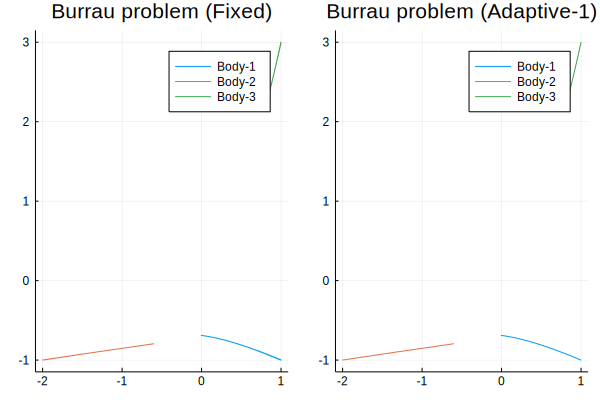

In [29]:
bodylist = ["Body-1", "Body-2", "Body-3"]
ulist0 = sol0.u
tlist0 = sol0.t

pl1 = plot(title="Burrau problem (Fixed)",aspect_ratio=1)

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist0)
 ylist  = map(u->u[2,2,j], ulist0)
 pl1 = plot!(xlist,ylist, label = bodylist[j])   
end    


pl2 = plot(title="Burrau problem (Adaptive-1)",aspect_ratio=1)

ulist1 = sol1.u[1:end]
tlist1 = sol1.t[1:end]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl2 = plot!(xlist,ylist, label = bodylist[j])   
end  


#plot(pl)
plot(pl1,pl2,layout=2) 

In [30]:
plot(pl2)
savefig("Burrau.png")

<a href="#top">Back to the top</a>

## Error in energy

In [31]:
#setprecision(BigFloat, 128)
#u0128, Gm =InitialBurrau(BigFloat)
u0128, Gm =InitialBurrau(Double64)
(typeof(u0128),typeof(Gm))

(Array{Double64,3}, Array{Int64,1})

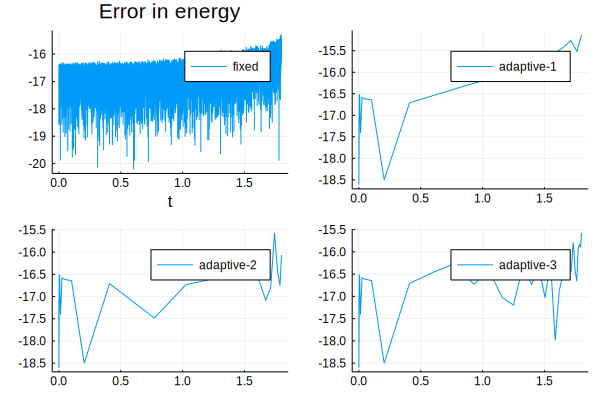

In [32]:
E0=NbodyEnergy(u0128,Gm)
end1=length(steps1)

ulist = sol0.u
tlist = sol0.t
EnergyErrors=[NbodyEnergy(Double64.(sol0.u[j]),Gm)/E0-1 for j in 1:length(tlist)]

ulist1 = sol1.u[1:end]
tlist1 = sol1.t[1:end]
EnergyErrors1=[NbodyEnergy(Double64.(sol1.u[j]),Gm)/E0-1 for j in 1:length(tlist1)]

ulist2 = sol2.u[1:end]
tlist2 = sol2.t[1:end]
EnergyErrors2=[NbodyEnergy(Double64.(sol2.u[j]),Gm)/E0-1 for j in 1:length(tlist2)]

ulist3 = sol3.u[1:end]
tlist3 = sol3.t[1:end]
EnergyErrors3=[NbodyEnergy(Double64.(sol3.u[j]),Gm)/E0-1 for j in 1:length(tlist3)]


p1=plot(tlist[1:end],log10.(abs.(EnergyErrors)), 
#    ylims=(axisya,axisyb),
    xlabel="t", title="Error in energy", label="fixed")
p2=plot(tlist1[1:end],log10.(abs.(EnergyErrors1)),
    label="adaptive-1")
p3=plot(tlist2[1:end],log10.(abs.(EnergyErrors2)), 
    label="adaptive-2")
p4=plot(tlist3[1:end],log10.(abs.(EnergyErrors3)),
    label="adaptive-3")
plot(p1,p2,p3,p4,layout=(2,2))